# Modeling Skydiving with Air Resistance
## Introduction

In this notebook, we model the skydiving problem, considering air resistance. The dynamics of a skydiver in freefall are described by the following ordinary differential equations (ODEs):

1. Horizontal velocity component:
   $$
   \frac{dv_{x}}{dt} = -\frac{b}{m} \sqrt{v_{x}^2 + v_{y}^2} \cdot v_{x}
   $$

2. Vertical velocity component:
   $$
   \frac{dv_{y}}{dt} = -g - \frac{b}{m} \sqrt{v_{x}^2 + v_{y}^2} \cdot v_{y}
   $$

Here, $\vec{S} = (v_x, v_y)$ represents the velocity vector (solution system), $b$ is the drag coefficient, $m$ is the mass of the skydiver, and $g$ is the acceleration due to gravity.

## Methodology

### 1. Define the ODE Function

To solve these differential equations using Python, we first define a function that computes the derivatives of the state variables:


In [2]:
# Our Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def dSdt(S, t, g, m, b):
    vx = S[0]
    vy = S[1]
    return [
        -b/m * np.sqrt(vx**2+vy**2) * vx, # dvx/dt
        -g - b/m * np.sqrt(vx**2+vy**2) * vy # dvy/dt
    ]

### 2. Set Initial Conditions and Parameters

We then set up the parameters for our simulation:

- **Time Span**: We will simulate the system over a time interval from 0 to 20 seconds.
- **Mass (m)**: 80 kg
- **Acceleration due to Gravity (g)**: 9.81 m/s²
- **Terminal Velocity (vt)**: -55 m/s (falling downwards)
- **Drag Coefficient (b)**: Calculated based on terminal velocity

In [4]:
# Time array
t = np.linspace(0, 20, 100) # 100 time points from 0 to 20 seconds

# Parameters
m = 80 # kg
g = 9.81 # m/s²
vt = -55 # m/s, terminal velocity
b = m * g / vt**2 # Drag coefficient

# Initial conditions
v0x, v0y = 50, 0 # Initial velocities (m/s)

### 3. Solve the ODE
We use the `odeint` function from SciPy to integrate the ODEs:

In [5]:
# Solve ODE
sol = odeint(dSdt, y0=[v0x, v0y], t=t, args=(g, m, b))

### 4. Analyze and Visualize Results
Extract and plot the velocity components:

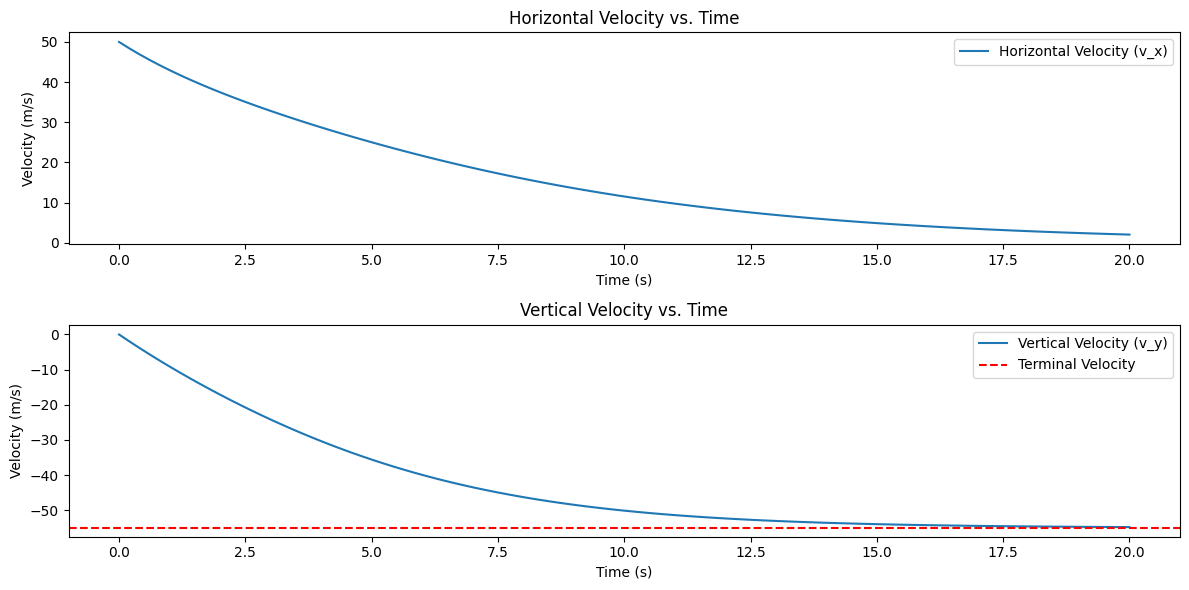

In [6]:
# Extract velocities
vx = sol.T[0]
vy = sol.T[1]

# Plot horizontal velocity
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, vx, label='Horizontal Velocity (v_x)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Horizontal Velocity vs. Time')
plt.legend()

# Plot vertical velocity
plt.subplot(2, 1, 2)
plt.plot(t, vy, label='Vertical Velocity (v_y)')
plt.axhline(vt, color='r', linestyle='--', label='Terminal Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Vertical Velocity vs. Time')
plt.legend()
plt.tight_layout()
plt.show()

### 5. Determine Time to Reach Terminal Velocity
Here's a question that cannot answered on paper: How long until you're about 1% of terminal velocity/one reaches terminal velocity?

To find when the skydiver reaches approximately 1% of the terminal velocity, compute the time indices where the condition is met:

In [7]:
# Calculate indices where vy is within 1% of terminal velocity
ind = np.abs(vy - vt)/np.abs(vt) < 0.01 # Index array with true or false values for the equation

# Times when the condition is met
time_to_terminal_velocity = t[ind] # Array of times filtering at indices where the equation holds true
print("Times to reach within 1% of terminal velocity:", time_to_terminal_velocity)

Times to reach within 1% of terminal velocity: [17.17171717 17.37373737 17.57575758 17.77777778 17.97979798 18.18181818
 18.38383838 18.58585859 18.78787879 18.98989899 19.19191919 19.39393939
 19.5959596  19.7979798  20.        ]


# Conclusion
The analysis shows how the skydiver's velocity evolves over time, considering air resistance. We observe how the horizontal and vertical velocities change and determine the time required to reach near terminal velocity.

Feel free to explore different parameters and initial conditions to further investigate the skydiving dynamics.